In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data1 = pd.read_csv("boston_1978.csv")

In [27]:
data1.corr(method = 'pearson', numeric_only=True)

,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
TRACT,1.000000,-0.220890,-0.225543,0.428252,-0.547165,0.367292,-0.575705,0.041356,-0.569807,0.305207,-0.487465,0.496841,-0.828829,-0.793602,-0.532678
LON,-0.220890,1.000000,0.143054,-0.322947,0.065101,-0.218081,0.062702,-0.175619,0.160871,-0.257110,0.204739,-0.011243,0.034067,0.050663,0.312602
LAT,-0.225543,0.143054,1.000000,0.006826,-0.084293,-0.129667,-0.041093,-0.044726,-0.068600,-0.069317,0.079035,-0.082981,-0.207013,-0.167718,-0.004527
MEDV,0.428252,-0.322947,0.006826,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655
CRIM,-0.547165,0.065101,-0.084293,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946
ZN,0.367292,-0.218081,-0.129667,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679
INDUS,-0.575705,0.062702,-0.041093,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248
CHAS,0.041356,-0.175619,-0.044726,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515
NOX,-0.569807,0.160871,-0.068600,-0.429300,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933
RM,0.305207,-0.257110,-0.069317,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501


In [28]:
corr_matrix =data1.corr(method = 'pearson', numeric_only=True)
tax_corr = corr_matrix['TAX']
top_var3 = tax_corr.abs().sort_values(ascending=False)[1:4]
top_var3

RAD      0.910228
TRACT    0.793602
INDUS    0.720760
Name: TAX, dtype: float64

In [29]:
data1_clean = data1.dropna(axis=0, how='any', inplace = False)

In [30]:
import statsmodels.api as sm

added_x = sm.add_constant(data1_clean[['RAD', 'TRACT', 'INDUS']])
ols_fitted = sm.OLS(data1_clean['TAX'], added_x).fit()

In [31]:
reg_coef = ols_fitted.params
print('--------regression coefficients ----------')
print(reg_coef)

--------regression coefficients ----------
const    221.818535
RAD       13.638393
TRACT     -0.006588
INDUS      6.642069
dtype: float64


In [32]:
print(ols_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    TAX   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1216.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          9.29e-230
Time:                        20:41:29   Log-Likelihood:                -2777.4
No. Observations:                 506   AIC:                             5563.
Df Residuals:                     502   BIC:                             5580.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        221.8185     15.075     14.714      0.0

In [33]:
predictive_values = ols_fitted.get_prediction(added_x)
results = predictive_values.summary_frame(alpha=0.05).round(4)

results.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,237.5507,7.9492,221.9330,253.1684,120.9931,354.1083
1,282.7395,6.7639,269.4503,296.0286,166.4710,399.0079
2,282.7329,6.7610,269.4496,296.0162,166.4650,399.0007
3,263.8322,7.2157,249.6555,278.0090,147.4590,380.2055
4,263.8257,7.2129,249.6544,277.9969,147.4530,380.1983


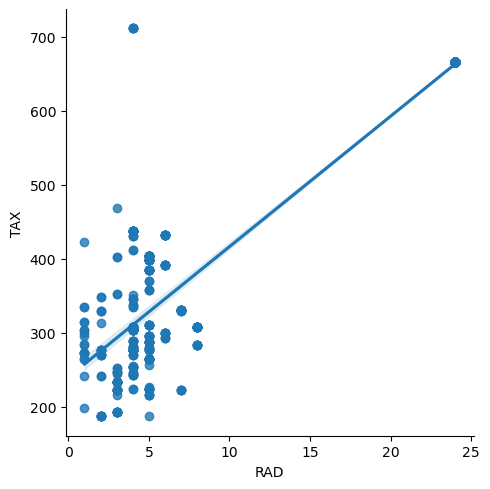

In [34]:
sns.lmplot(x='RAD', y='TAX', data= data1_clean, ci=95)

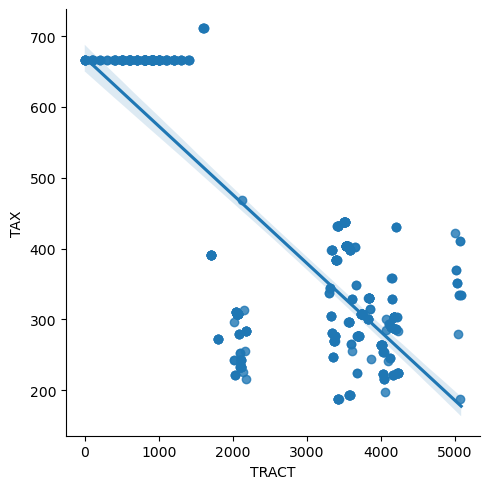

In [35]:
sns.lmplot(x='TRACT', y='TAX', data= data1_clean, ci=95)

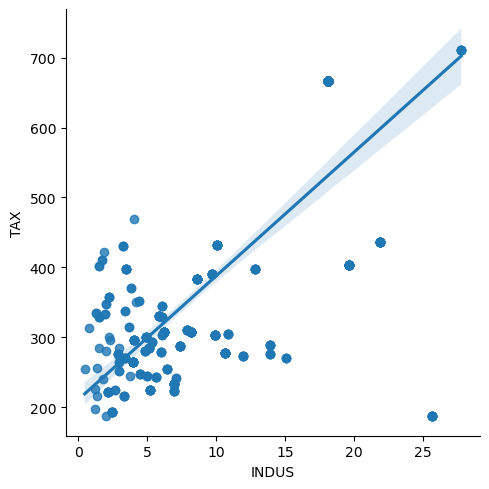

In [36]:
sns.lmplot(x='INDUS', y='TAX', data= data1_clean, ci=95)